Opening raw data file sub-102/meg/sub-102_task-amnoise_meg.fif...
    Read a total of 11 projection items:
        mag.fif : PCA-v1 (1 x 306)  idle
        mag.fif : PCA-v2 (1 x 306)  idle
        mag.fif : PCA-v3 (1 x 306)  idle
        mag.fif : PCA-v4 (1 x 306)  idle
        mag.fif : PCA-v5 (1 x 306)  idle
        mag.fif : PCA-v6 (1 x 306)  idle
        mag.fif : PCA-v7 (1 x 306)  idle
        grad.fif : PCA-v1 (1 x 306)  idle
        grad.fif : PCA-v2 (1 x 306)  idle
        grad.fif : PCA-v3 (1 x 306)  idle
        grad.fif : PCA-v4 (1 x 306)  idle
    Range : 38400 ... 1323599 =     32.000 ...  1102.999 secs
Ready.


C:\Users\smshr\AppData\Local\Temp\ipykernel_17100\2188584920.py:7: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne.io.read_raw_fif(file_path, preload=True, allow_maxshield=True)


Reading 0 ... 1285199  =      0.000 ...  1070.999 secs...
<Info | 25 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, MEG0132, ...
 chs: 204 Gradiometers, 102 Magnetometers, 11 Stimulus, 2 EOG, 1 ECG, 12 misc
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 dev_head_t: MEG device -> head transform
 dig: 167 items (3 Cardinal, 5 HPI, 159 Extra)
 events: 1 item (list)
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 3 items (dict)
 line_freq: 60.0
 lowpass: 326.4 Hz
 maxshield: True
 meas_date: 2000-01-01 00:00:00 UTC
 meas_id: 4 items (dict)
 nchan: 332
 proc_history: 1 item (list)
 proj_id: 1 item (ndarray)
 proj_name: mne_anonymize
 projs: mag.fif : PCA-v1: off, mag.fif : PCA-v2: off, mag.fif : PCA-v3: ...
 sfreq: 1200.0 

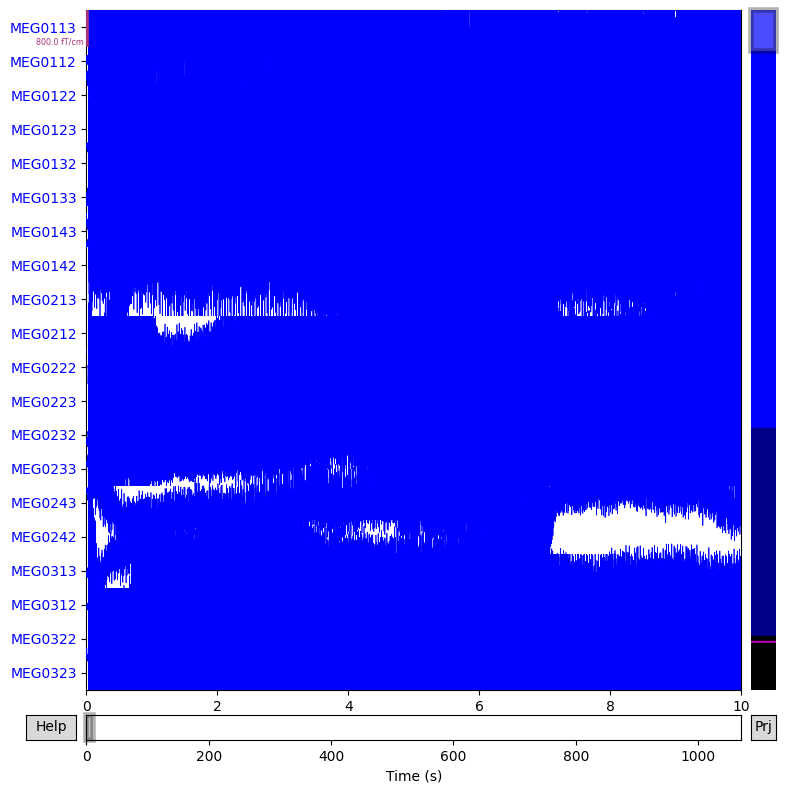

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.707 (s)
Plotting power spectral density (dB=True).


C:\Users\smshr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


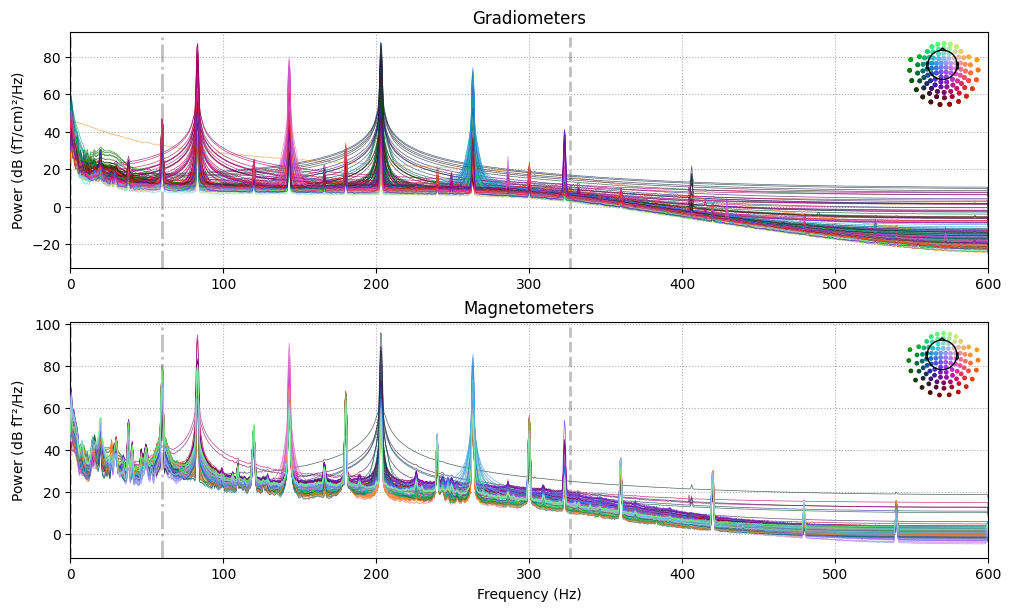

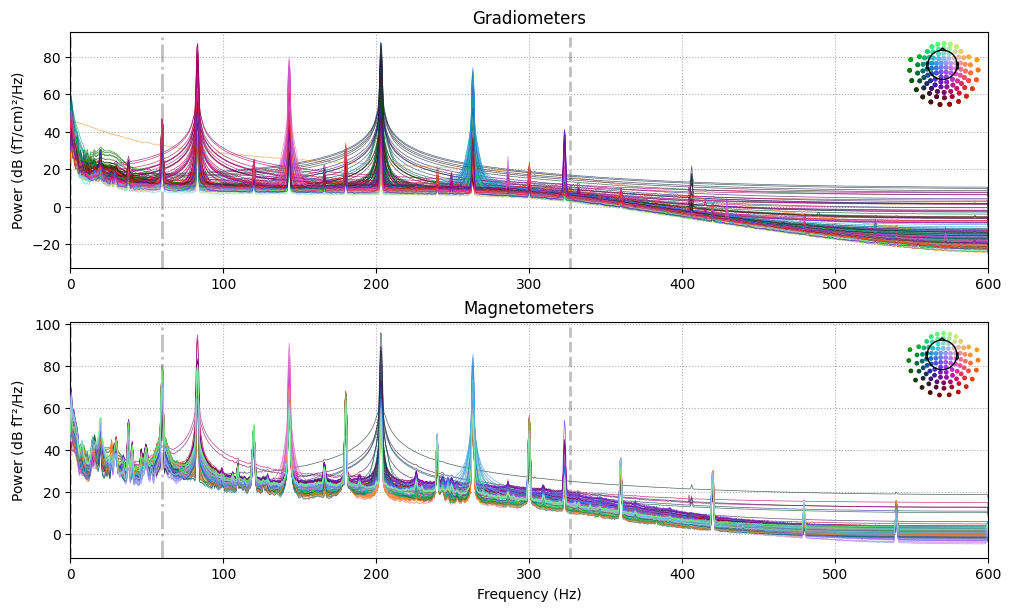

In [2]:
import mne

# Filepath to your .fif file
file_path = r"sub-102/meg/sub-102_task-amnoise_meg.fif"

# Load the raw MEG data with allow_maxshield=True
raw = mne.io.read_raw_fif(file_path, preload=True, allow_maxshield=True)

# Print basic information about the dataset
print(raw.info)

# Plot the raw data
raw.plot()

# Plot the power spectral density (PSD)
raw.plot_psd()

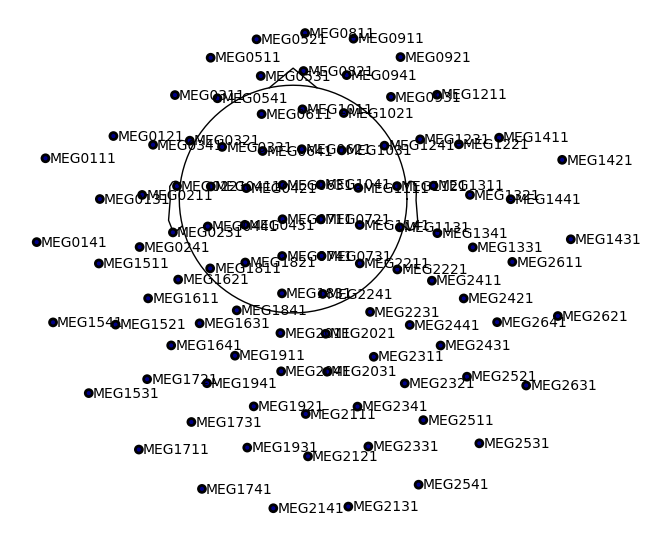

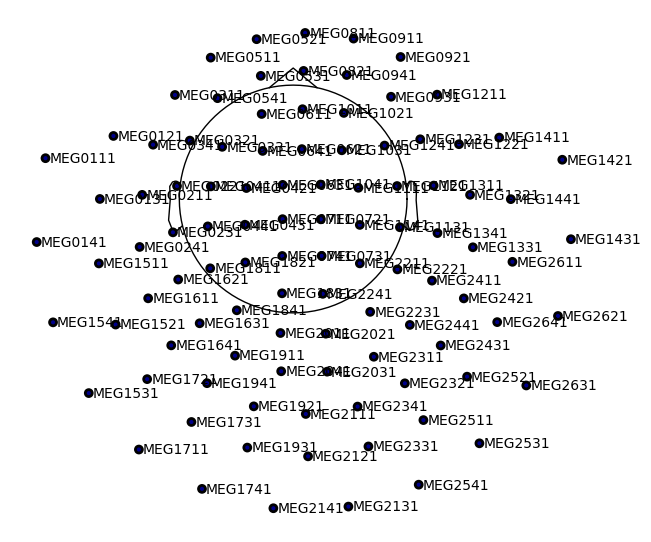

In [3]:
# Plot the sensor layout
raw.plot_sensors(kind='topomap', show_names=True)

880 events found on stim channel STI101
Event IDs: [1 4 8]
Not setting metadata
880 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 11)
11 projection items activated
Using data from preloaded Raw for 880 events and 841 original time points ...
0 bad epochs dropped


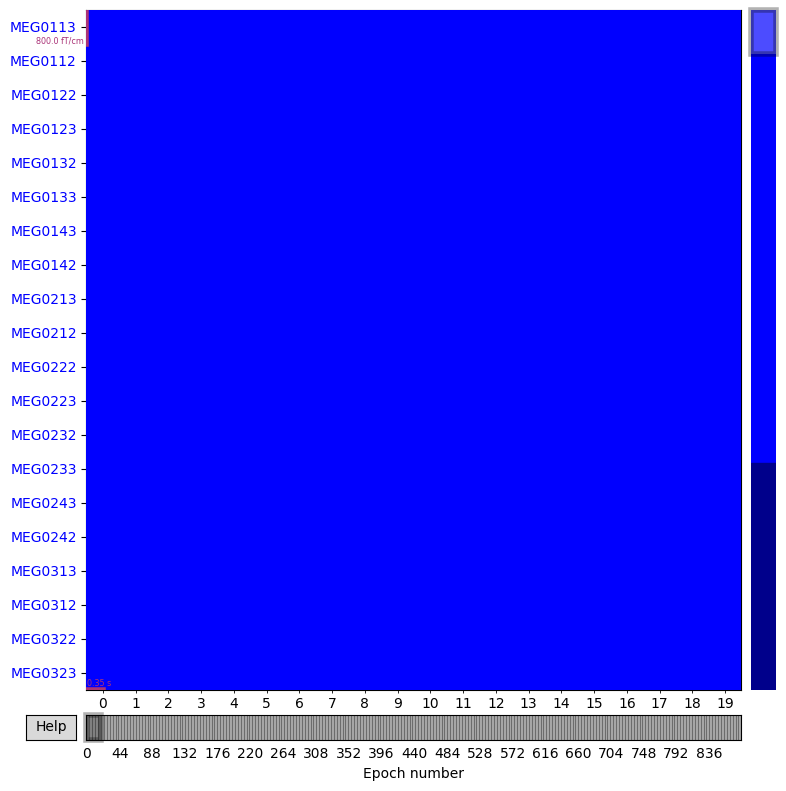

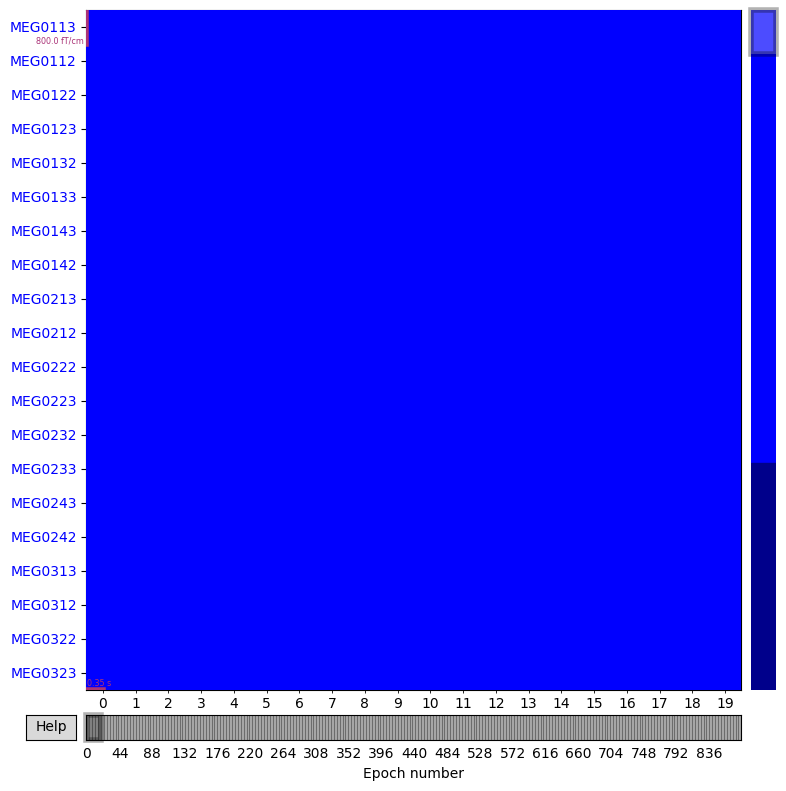

In [6]:
# Detect events (requires an events file or annotations)
events = mne.find_events(raw)

# Create epochs around the events
epochs = mne.Epochs(raw, events, event_id=None, tmin=-0.2, tmax=0.5, preload=True)

# Plot the epochs
epochs.plot()

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
No baseline correction applied


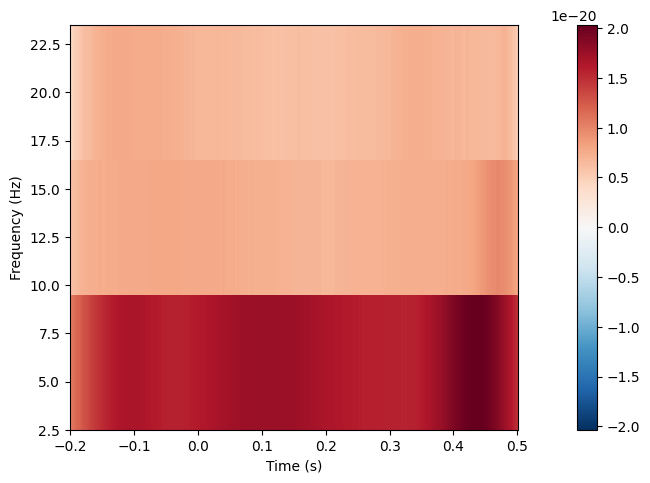

[<Figure size 640x480 with 2 Axes>]

In [8]:
# Compute TFR on epochs
freqs = [6, 10, 20]  # Frequencies of interest
n_cycles = 2  # Number of cycles
time_bandwidth = 2.0  # Time bandwidth
tfr = tfr_multitaper(epochs, freqs=freqs, n_cycles=n_cycles, time_bandwidth=time_bandwidth, return_itc=False)

# Plot the TFR for the first channel
tfr.plot([0])  # Replace [0] with the index of the channel you want to plot

Fitting ICA to data using 306 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 154.9s.


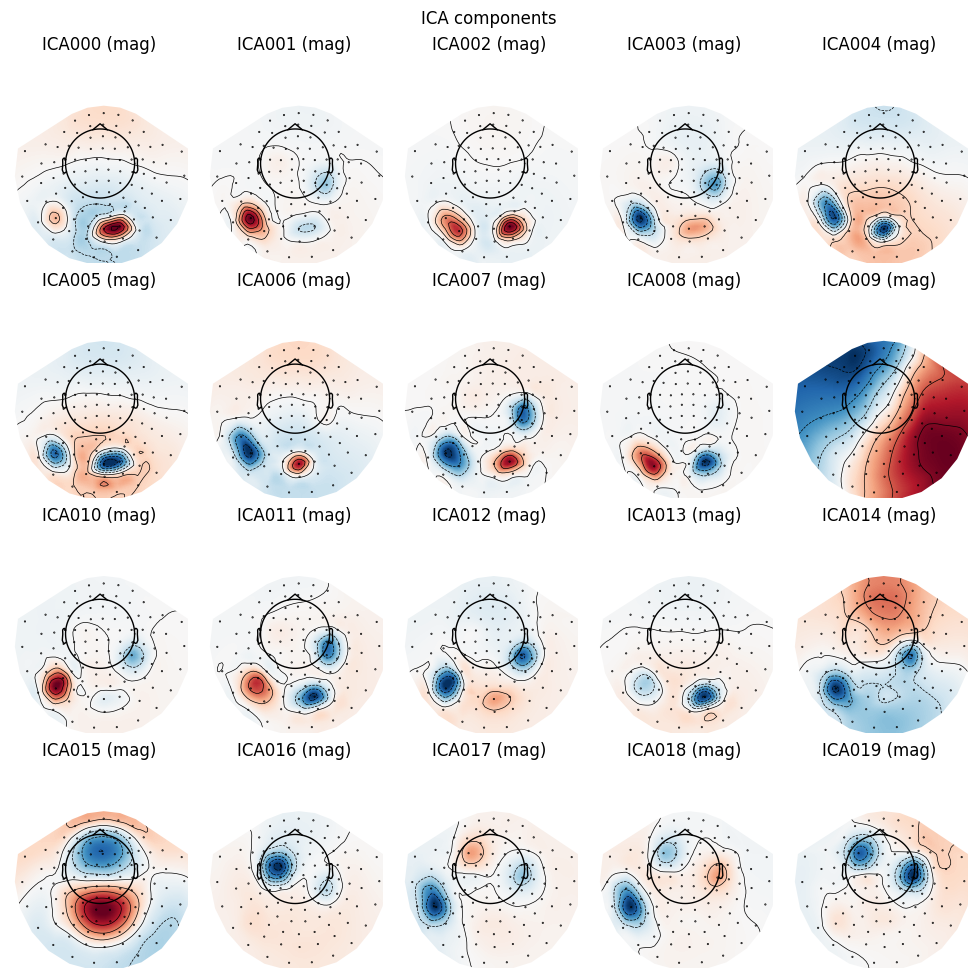

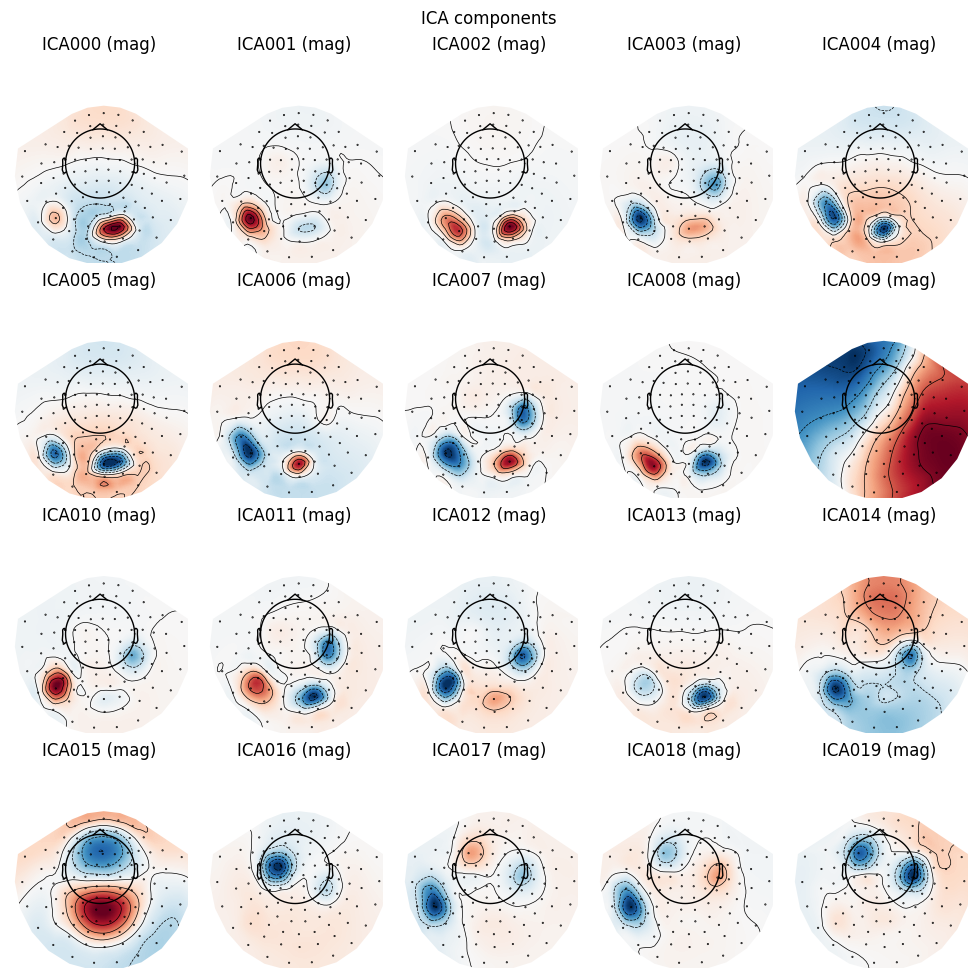

In [15]:
from mne.preprocessing import ICA

# Fit ICA
ica = ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)

# Plot ICA components
ica.plot_components()